In [121]:
# Ordinary least squares
from sklearn import linear_model
reg = linear_model.RidgeCV (alphas = [0.1,0.2,0.07])
reg.fit([[0,0,0],[1,2,2],[3,2,2]],[0,5,7])

RidgeCV(alphas=[0.1, 0.2, 0.07], cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [51]:
reg.alpha_

0.070000000000000007

In [52]:
reg.intercept_

0.034554019235264022

In [53]:
reg.get_params(deep=True)

{'alphas': [0.1, 0.2, 0.07],
 'cv': None,
 'fit_intercept': True,
 'gcv_mode': None,
 'normalize': False,
 'scoring': None,
 'store_cv_values': False}

In [54]:
reg.predict([[10,10,10]])

array([ 29.77539887])

In [55]:
reg.score([[0,0,0],[1,1,1],[2,2,2]],[0,1,2])

-8.9489525206830933

In [63]:
import os
os.listdir()

['.ipynb_checkpoints', 'Program.ipynb', 'Train_UWu5bXk.csv']

In [2]:
import numpy as np
import pandas as pd
data = pd.read_csv('Train_UWu5bXk.csv')

In [3]:
data.Item_Identifier.nunique()

1559

In [4]:
list(data)

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

In [5]:
for col in list(data):
        count1 = data[col].nunique()
        type1 = data[col].dtype
        print("{}: \t type is: {} \t distinct values {}".format(col,type1,count1))

Item_Identifier: 	 type is: object 	 distinct values 1559
Item_Weight: 	 type is: float64 	 distinct values 415
Item_Fat_Content: 	 type is: object 	 distinct values 5
Item_Visibility: 	 type is: float64 	 distinct values 7880
Item_Type: 	 type is: object 	 distinct values 16
Item_MRP: 	 type is: float64 	 distinct values 5938
Outlet_Identifier: 	 type is: object 	 distinct values 10
Outlet_Establishment_Year: 	 type is: int64 	 distinct values 9
Outlet_Size: 	 type is: object 	 distinct values 3
Outlet_Location_Type: 	 type is: object 	 distinct values 3
Outlet_Type: 	 type is: object 	 distinct values 4
Item_Outlet_Sales: 	 type is: float64 	 distinct values 3493


In [6]:
data = data.drop(['Item_Identifier','Item_Visibility'], 1)

In [7]:
data.Item_Weight.size

8523

In [8]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

In [9]:
#check for any missing data
#Lists only non-missing values - not NAN values.
data.Item_Weight.count()

7060

In [10]:
data.Item_Weight.isnull().values.ravel().sum()

1463

In [11]:
for col in list(data):
        Null_values = data[col].isnull().values.ravel().sum()
        print("{}: {}".format(col,Null_values))

Item_Weight: 1463
Item_Fat_Content: 0
Item_Type: 0
Item_MRP: 0
Outlet_Identifier: 0
Outlet_Establishment_Year: 0
Outlet_Size: 2410
Outlet_Location_Type: 0
Outlet_Type: 0
Item_Outlet_Sales: 0


In [12]:
data.Item_Weight.isnull().values.ravel().sum()

1463

In [13]:
data.Item_Weight = data.Item_Weight.fillna(0)
  

In [14]:
list(data)

['Item_Weight',
 'Item_Fat_Content',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

In [15]:
count = 0
i = 0
for weight in data['Item_Weight']:
    
    if data.at[i,'Item_Weight']== 0.000:
        count +=1
    i += 1


In [16]:
count

1463

In [17]:
sLength = len(data['Item_Weight'])

In [18]:
data['Item_Weight_Missing'] = pd.Series(np.random.randn(sLength))

In [19]:
list(data)

['Item_Weight',
 'Item_Fat_Content',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales',
 'Item_Weight_Missing']

In [20]:
i = 0
for i1 in data['Item_Weight_Missing']:
    if data.at[i,'Item_Weight']== 0.000:
        data.at[i,'Item_Weight_Missing'] = 1.000
    else:
        data.at[i,'Item_Weight_Missing'] = 0.000
    i += 1

In [21]:
data.Outlet_Size = data.Outlet_Size.fillna('NotListed')

In [22]:
i = 0
for i1 in data['Outlet_Size']:
    if data.at[i,'Outlet_Size']== "NotListed":
        data.at[i,'Outlet_Size_Missing'] = 1.000
    else:
        data.at[i,'Outlet_Size_Missing'] = 0.000
    i += 1

In [23]:
len(data['Outlet_Size_Missing'])

8523

In [28]:
i = 0
for i1 in data['Item_Fat_Content']:
    if data.at[i,'Item_Fat_Content']== "LF" or data.at[i,'Item_Fat_Content']== "low fat":
        data.at[i,'Item_Fat_Content'] = "Low Fat"
    if data.at[i,'Item_Fat_Content']== "reg" :
        data.at[i,'Item_Fat_Content'] = "Regular"
    i += 1

In [29]:
data1 = pd.get_dummies(data['Item_Fat_Content'])

In [31]:
result = pd.concat([data, data1], axis=1, join_axes=[data.index])

In [33]:
data = result

In [36]:
data = data.drop(['Item_Fat_Content'],1)

In [37]:
data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [39]:
data1 = pd.get_dummies(data['Item_Type'])
result = pd.concat([data, data1], axis=1, join_axes=[data.index])
data = result
data = data.drop(['Item_Type'],1)

In [40]:
data.head()

,Item_Weight,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Missing,Outlet_Size_Missing,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,9.30,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,17.50,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
3,19.20,182.0950,OUT010,1998,NotListed,Tier 3,Grocery Store,732.3800,0.0,1.0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0


In [50]:
data1 = pd.get_dummies(data['Outlet_Identifier'])
result = pd.concat([data, data1], axis=1, join_axes=[data.index])
data = result
data = data.drop(['Outlet_Identifier'],1)

In [51]:
data.head()

,Item_Weight,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Missing,Outlet_Size_Missing,Low Fat,...,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
0,9.30,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,1
1,5.92,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,0.0,0.0,0,...,0,0,0,1,0,0,0,0,0,0
2,17.50,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0.0,0.0,1,...,0,0,0,0,0,0,0,0,0,1
3,19.20,182.0950,1998,NotListed,Tier 3,Grocery Store,732.3800,0.0,1.0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,0.0,0.0,1,...,0,1,0,0,0,0,0,0,0,0


In [55]:


data1 = pd.get_dummies(data['Outlet_Size'])
result = pd.concat([data, data1], axis=1, join_axes=[data.index])
data = result
data = data.drop(['Outlet_Size'],1)

data1 = pd.get_dummies(data['Outlet_Location_Type'])
result = pd.concat([data, data1], axis=1, join_axes=[data.index])
data = result
data = data.drop(['Outlet_Location_Type'],1)

data1 = pd.get_dummies(data['Outlet_Type'])
result = pd.concat([data, data1], axis=1, join_axes=[data.index])
data = result
data = data.drop(['Outlet_Type'],1)

In [56]:
data.head()

,Item_Weight,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Weight_Missing,Outlet_Size_Missing,Low Fat,Regular,Baking Goods,Breads,...,Medium,NotListed,Small,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,249.8092,1999,3735.1380,0.0,0.0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,5.92,48.2692,2009,443.4228,0.0,0.0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
2,17.50,141.6180,1999,2097.2700,0.0,0.0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
3,19.20,182.0950,1998,732.3800,0.0,1.0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,53.8614,1987,994.7052,0.0,0.0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [57]:
list(data)

['Item_Weight',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales',
 'Item_Weight_Missing',
 'Outlet_Size_Missing',
 'Low Fat',
 'Regular',
 'Baking Goods',
 'Breads',
 'Breakfast',
 'Canned',
 'Dairy',
 'Frozen Foods',
 'Fruits and Vegetables',
 'Hard Drinks',
 'Health and Hygiene',
 'Household',
 'Meat',
 'Others',
 'Seafood',
 'Snack Foods',
 'Soft Drinks',
 'Starchy Foods',
 'OUT010',
 'OUT013',
 'OUT017',
 'OUT018',
 'OUT019',
 'OUT027',
 'OUT035',
 'OUT045',
 'OUT046',
 'OUT049',
 'High',
 'Medium',
 'NotListed',
 'Small',
 'Tier 1',
 'Tier 2',
 'Tier 3',
 'Grocery Store',
 'Supermarket Type1',
 'Supermarket Type2',
 'Supermarket Type3']

In [59]:
data.Outlet_Establishment_Year.unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [64]:
data['Outlet_Establishment_Year'] = data['Outlet_Establishment_Year'] - 1985

In [65]:
data.head()

,Item_Weight,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Weight_Missing,Outlet_Size_Missing,Low Fat,Regular,Baking Goods,Breads,...,Medium,NotListed,Small,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,249.8092,14,3735.1380,0.0,0.0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,5.92,48.2692,24,443.4228,0.0,0.0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
2,17.50,141.6180,14,2097.2700,0.0,0.0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
3,19.20,182.0950,13,732.3800,0.0,1.0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,53.8614,2,994.7052,0.0,0.0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [78]:
import matplotlib.pyplot as plt

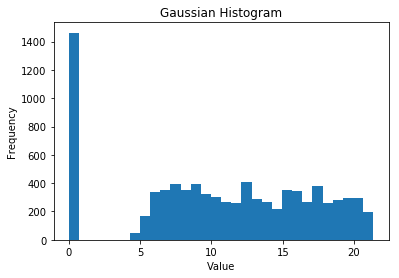

In [85]:
# the histogram of the data
%matplotlib inline
x = data['Item_Weight']
plt.hist(x,normed=False, bins=30)
plt.title("Item_Weigh")
plt.xlabel("Value")
plt.ylabel("Frequency")

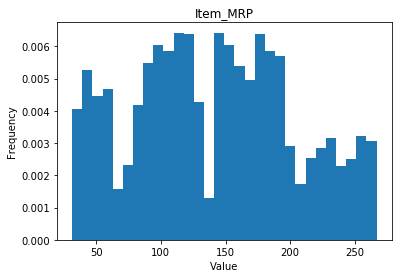

In [88]:
%matplotlib inline
x = data['Item_MRP']
plt.hist(x,normed=True, bins=30)
plt.title("Item_MRP")
plt.xlabel("Value")
plt.ylabel("Frequency")

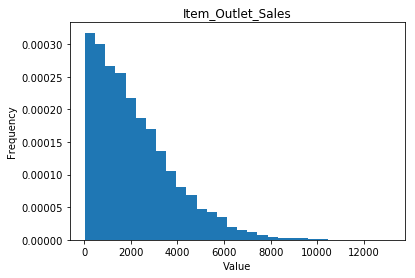

In [89]:
x = data['Item_Outlet_Sales']
plt.hist(x,normed=True, bins=30)
plt.title("Item_Outlet_Sales")
plt.xlabel("Value")
plt.ylabel("Frequency")

In [90]:
data['Outlet_Establishment_Year'] = data['Outlet_Establishment_Year'] + 1985

In [91]:
data.head()

,Item_Weight,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Weight_Missing,Outlet_Size_Missing,Low Fat,Regular,Baking Goods,Breads,...,Medium,NotListed,Small,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,249.8092,1999,3735.1380,0.0,0.0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
1,5.92,48.2692,2009,443.4228,0.0,0.0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
2,17.50,141.6180,1999,2097.2700,0.0,0.0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
3,19.20,182.0950,1998,732.3800,0.0,1.0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.93,53.8614,1987,994.7052,0.0,0.0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [97]:
from sklearn import preprocessing
X = data['Item_Weight']
X_scaled = preprocessing.scale(X)

In [98]:
X_scaled

array([-0.20999534, -0.73553195,  1.06497512, ..., -0.00786588,
       -0.53495733,  0.64516777])

In [109]:
data1 = pd.DataFrame(preprocessing.scale(data['Item_Weight']))
result = pd.concat([data, data1], axis=1, join_axes=[data.index])
data = result
data = data.drop(['Item_Weight'],1)

# data1 = pd.get_dummies(data['Outlet_Location_Type'])
# result = pd.concat([data, data1], axis=1, join_axes=[data.index])
# data = result
# data = data.drop(['Outlet_Location_Type'],1)

# data1 = pd.get_dummies(data['Outlet_Type'])
# result = pd.concat([data, data1], axis=1, join_axes=[data.index])
# data = result
# data = data.drop(['Outlet_Type'],1)

KeyError: 'Item_Weight'

In [110]:
data.head()

,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Weight_Missing,Outlet_Size_Missing,Low Fat,Regular,Baking Goods,Breads,Breakfast,...,NotListed,Small,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,0
0,249.8092,1999,3735.1380,0.0,0.0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,-0.209995
1,48.2692,2009,443.4228,0.0,0.0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,-0.735532
2,141.6180,1999,2097.2700,0.0,0.0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1.064975
3,182.0950,1998,732.3800,0.0,1.0,0,1,0,0,0,...,1,0,0,0,1,1,0,0,0,1.329298
4,53.8614,1987,994.7052,0.0,0.0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,-0.267524


In [111]:
list(data)

['Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales',
 'Item_Weight_Missing',
 'Outlet_Size_Missing',
 'Low Fat',
 'Regular',
 'Baking Goods',
 'Breads',
 'Breakfast',
 'Canned',
 'Dairy',
 'Frozen Foods',
 'Fruits and Vegetables',
 'Hard Drinks',
 'Health and Hygiene',
 'Household',
 'Meat',
 'Others',
 'Seafood',
 'Snack Foods',
 'Soft Drinks',
 'Starchy Foods',
 'OUT010',
 'OUT013',
 'OUT017',
 'OUT018',
 'OUT019',
 'OUT027',
 'OUT035',
 'OUT045',
 'OUT046',
 'OUT049',
 'High',
 'Medium',
 'NotListed',
 'Small',
 'Tier 1',
 'Tier 2',
 'Tier 3',
 'Grocery Store',
 'Supermarket Type1',
 'Supermarket Type2',
 'Supermarket Type3',
 0]

In [113]:
data.rename(
  columns={
    0 : 'Item_Weight_Scaled',
  },
  inplace=True
)

In [114]:
data.head()

,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Weight_Missing,Outlet_Size_Missing,Low Fat,Regular,Baking Goods,Breads,Breakfast,...,NotListed,Small,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,Item_Weight_Scaled
0,249.8092,1999,3735.1380,0.0,0.0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,-0.209995
1,48.2692,2009,443.4228,0.0,0.0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,-0.735532
2,141.6180,1999,2097.2700,0.0,0.0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1.064975
3,182.0950,1998,732.3800,0.0,1.0,0,1,0,0,0,...,1,0,0,0,1,1,0,0,0,1.329298
4,53.8614,1987,994.7052,0.0,0.0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,-0.267524


In [115]:
data1 = pd.DataFrame(preprocessing.scale(data['Item_MRP']))
result = pd.concat([data, data1], axis=1, join_axes=[data.index])
data = result
data = data.drop(['Item_MRP'],1)

In [116]:
data1 = pd.DataFrame(preprocessing.scale(data['Outlet_Establishment_Year']))
result = pd.concat([data, data1], axis=1, join_axes=[data.index])
data = result
data = data.drop(['Outlet_Establishment_Year'],1)

C:\Users\DamodaraBattula\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


In [117]:
data.head()

,Item_Outlet_Sales,Item_Weight_Missing,Outlet_Size_Missing,Low Fat,Regular,Baking Goods,Breads,Breakfast,Canned,Dairy,...,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,Item_Weight_Scaled,0,0
0,3735.1380,0.0,0.0,1,0,0,0,0,0,1,...,1,0,0,0,1,0,0,-0.209995,1.747454,0.139541
1,443.4228,0.0,0.0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,-0.735532,-1.489023,1.334103
2,2097.2700,0.0,0.0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1.064975,0.010040,0.139541
3,732.3800,0.0,1.0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,1.329298,0.660050,0.020085
4,994.7052,0.0,0.0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,-0.267524,-1.399220,-1.293934


In [118]:
data.rename(
  columns={
    0 : 'Outlet_Year',
  },
  inplace=True
)

C:\Users\DamodaraBattula\Anaconda3\lib\site-packages\pandas\core\frame.py:2834: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [119]:
data.head()

,Item_Outlet_Sales,Item_Weight_Missing,Outlet_Size_Missing,Low Fat,Regular,Baking Goods,Breads,Breakfast,Canned,Dairy,...,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,Item_Weight_Scaled,Outlet_Year,Outlet_Year
0,3735.1380,0.0,0.0,1,0,0,0,0,0,1,...,1,0,0,0,1,0,0,-0.209995,1.747454,0.139541
1,443.4228,0.0,0.0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,-0.735532,-1.489023,1.334103
2,2097.2700,0.0,0.0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1.064975,0.010040,0.139541
3,732.3800,0.0,1.0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,1.329298,0.660050,0.020085
4,994.7052,0.0,0.0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,-0.267524,-1.399220,-1.293934


In [124]:
data = data.drop(['Outlet_Year'],1)

ValueError: labels ['Outlet_Year'] not contained in axis

In [125]:
data.head()

,Item_Outlet_Sales,Item_Weight_Missing,Outlet_Size_Missing,Low Fat,Regular,Baking Goods,Breads,Breakfast,Canned,Dairy,...,NotListed,Small,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,Item_Weight_Scaled
0,3735.1380,0.0,0.0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,-0.209995
1,443.4228,0.0,0.0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,-0.735532
2,2097.2700,0.0,0.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1.064975
3,732.3800,0.0,1.0,0,1,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,1.329298
4,994.7052,0.0,0.0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,-0.267524


In [126]:
data1 = pd.read_csv('Train_UWu5bXk.csv')

In [127]:
data1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [128]:
data = pd.concat([data, data1['Outlet_Establishment_Year']], axis=1, join_axes=[data.index])


In [130]:
data = pd.concat([data, data1['Item_MRP']], axis=1, join_axes=[data.index])

In [131]:
data1 = pd.DataFrame(preprocessing.scale(data['Item_MRP']))
result = pd.concat([data, data1], axis=1, join_axes=[data.index])
data = result
data = data.drop(['Item_MRP'],1)

In [132]:
data.head()

,Item_Outlet_Sales,Item_Weight_Missing,Outlet_Size_Missing,Low Fat,Regular,Baking Goods,Breads,Breakfast,Canned,Dairy,...,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,Item_Weight_Scaled,Outlet_Establishment_Year,0
0,3735.1380,0.0,0.0,1,0,0,0,0,0,1,...,1,0,0,0,1,0,0,-0.209995,1999,1.747454
1,443.4228,0.0,0.0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,-0.735532,2009,-1.489023
2,2097.2700,0.0,0.0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1.064975,1999,0.010040
3,732.3800,0.0,1.0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,1.329298,1998,0.660050
4,994.7052,0.0,0.0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,-0.267524,1987,-1.399220


In [135]:
data.rename(
  columns={
    0 : 'Item_MRP'}
  ,
  inplace=True
)

In [136]:
data.head()

,Item_Outlet_Sales,Item_Weight_Missing,Outlet_Size_Missing,Low Fat,Regular,Baking Goods,Breads,Breakfast,Canned,Dairy,...,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,Item_Weight_Scaled,Outlet_Establishment_Year,Item_MRP
0,3735.1380,0.0,0.0,1,0,0,0,0,0,1,...,1,0,0,0,1,0,0,-0.209995,1999,1.747454
1,443.4228,0.0,0.0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,-0.735532,2009,-1.489023
2,2097.2700,0.0,0.0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1.064975,1999,0.010040
3,732.3800,0.0,1.0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,1.329298,1998,0.660050
4,994.7052,0.0,0.0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,-0.267524,1987,-1.399220


In [137]:
data1 = pd.DataFrame(preprocessing.scale(data['Outlet_Establishment_Year']))
result = pd.concat([data, data1], axis=1, join_axes=[data.index])
data = result
data = data.drop(['Outlet_Establishment_Year'],1)
data.rename(
  columns={
    0 : 'Outlet_Establishment_Year'}
  ,
  inplace=True
)

C:\Users\DamodaraBattula\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


In [138]:
data.head()

,Item_Outlet_Sales,Item_Weight_Missing,Outlet_Size_Missing,Low Fat,Regular,Baking Goods,Breads,Breakfast,Canned,Dairy,...,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,Item_Weight_Scaled,Item_MRP,Outlet_Establishment_Year
0,3735.1380,0.0,0.0,1,0,0,0,0,0,1,...,1,0,0,0,1,0,0,-0.209995,1.747454,0.139541
1,443.4228,0.0,0.0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,-0.735532,-1.489023,1.334103
2,2097.2700,0.0,0.0,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1.064975,0.010040,0.139541
3,732.3800,0.0,1.0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,1.329298,0.660050,0.020085
4,994.7052,0.0,0.0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,-0.267524,-1.399220,-1.293934


In [139]:
target = pd.DataFrame(data['Item_Outlet_Sales'])

In [140]:
data = data.drop(['Item_Outlet_Sales'],1)

In [142]:
target.head()

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052


In [148]:
from sklearn import linear_model
reg1 = linear_model.RidgeCV (alphas = [0.1,0.2,0.07])
reg1.fit(data,target)

RidgeCV(alphas=[0.1, 0.2, 0.07], cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [150]:
reg1.coef_

array([[  1.04991717e+02,  -1.72116661e+02,  -1.98724832e+01,
          1.98724832e+01,  -6.33401609e+00,  -3.41425276e-01,
         -3.17362192e+00,   1.92395572e+01,  -4.81069346e+01,
         -3.34633481e+01,   2.35116764e+01,  -6.06870097e+00,
         -1.32243554e+01,  -4.37109285e+01,  -4.31190849e+00,
         -2.52299360e+01,   1.76501210e+02,  -1.72494647e+01,
         -3.29043292e+01,   1.48665261e+01,  -3.81043445e+02,
         -6.46469315e+01,   2.08245123e+02,  -1.30788544e+02,
         -4.91456191e+02,   5.96447908e+02,   2.55477661e+01,
          6.81661420e-01,   3.23849094e+02,  -8.68364405e+01,
         -6.46469315e+01,   3.78822924e+02,  -1.72116661e+02,
         -1.42059331e+02,  -2.54443538e+02,   2.34474550e+02,
          1.99689879e+01,  -8.72499636e+02,   4.06840272e+02,
         -1.30788544e+02,   5.96447908e+02,  -3.00619733e+00,
          9.69284582e+02,  -5.64927769e+01]])

In [151]:
#predicted values
pred = reg1.predict(data)

In [161]:
err = abs(pred-target)
# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.sum(err*err)
# Compute RMSE
rmse_train = np.sqrt(total_error/len(pred))


,Item_Outlet_Sales
0,268.838635
1,105.361438
2,262.620631
3,308.886384
4,102.068516
5,65.398929
6,672.192473
7,847.838599
8,432.700718
9,1614.711136


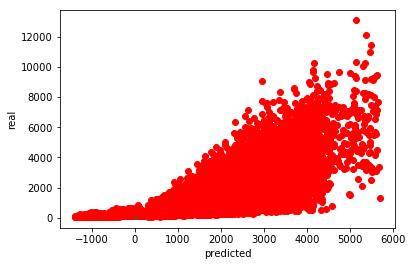

In [156]:
# Plot outputs
%matplotlib inline
plt.plot(pred,target,'ro')
plt.plot([0,50],[0,50], 'g-')
plt.xlabel('predicted')
plt.ylabel('real')
plt.show()

In [165]:
pred_df = pd.DataFrame(pred)
err_df = pd.DataFrame(err)
target_df = pd.DataFrame(target)
pd.concat([err_df, pred_df,target_df], axis=1, join_axes=[data.index])

,Item_Outlet_Sales,0,Item_Outlet_Sales
0,268.838635,4003.976635,3735.1380
1,105.361438,548.784238,443.4228
2,262.620631,2359.890631,2097.2700
3,308.886384,1041.266384,732.3800
4,102.068516,892.636684,994.7052
5,65.398929,622.007729,556.6088
6,672.192473,1015.745273,343.5528
7,847.838599,3174.925001,4022.7636
8,432.700718,1509.299318,1076.5986
9,1614.711136,3095.823864,4710.5350
